In [2]:
pip install lasio


     --------------------------------------- 47.4/47.4 kB 38.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing libraries
import lasio
import matplotlib.pyplot as plt

In [6]:
#loading dataset
well_path="C:/Users/somaa/Downloads/00-01-01-073-05W5-0.LAS"
well=lasio.read(well_path)

In [7]:
well.data

array([[3.90000e+02, 1.99000e-01, 4.57000e-01, 8.24780e+01, 2.38379e+02,
        2.92300e+00],
       [3.90250e+02, 2.08000e-01, 4.56000e-01, 8.64130e+01, 2.38331e+02,
        2.92500e+00],
       [3.90500e+02, 2.46000e-01, 4.52000e-01, 9.02290e+01, 2.38069e+02,
        2.91700e+00],
       ...,
       [6.49500e+02, 2.30000e-02, 1.26000e-01, 5.11290e+01, 2.65467e+02,
        1.44490e+01],
       [6.49750e+02, 2.80000e-02, 1.46000e-01, 5.83400e+01, 2.66024e+02,
        1.22360e+01],
       [6.50000e+02, 3.60000e-02, 1.66000e-01, 6.46220e+01, 2.66581e+02,
        1.05760e+01]])

In [8]:
#displaying mnemonics
well.curves

[CurveItem(mnemonic="DEPT", unit="M", value="00 001 00 00", descr="DEPTH        - DEPTH", original_mnemonic="DEPT", data.shape=(1041,)),
 CurveItem(mnemonic="DPHI", unit="V/V", value="00 890 00 00", descr="PHID         - DENSITY POROSITY (SANDSTONE)", original_mnemonic="DPHI", data.shape=(1041,)),
 CurveItem(mnemonic="NPHI", unit="V/V", value="00 330 00 00", descr="PHIN         - NEUTRON POROSITY (SANDSTONE)", original_mnemonic="NPHI", data.shape=(1041,)),
 CurveItem(mnemonic="GR", unit="API", value="00 310 00 00", descr="GR           - GAMMA RAY", original_mnemonic="GR", data.shape=(1041,)),
 CurveItem(mnemonic="CALI", unit="MM", value="00 280 01 00", descr="CAL          - CALIPER", original_mnemonic="CALI", data.shape=(1041,)),
 CurveItem(mnemonic="ILD", unit="OHMM", value="00 120 00 00", descr="RESD         - DEEP RESISTIVITY (DIL)", original_mnemonic="ILD", data.shape=(1041,))]

In [9]:
#converting into a dataframe
well.df().reset_index()

,DEPT,DPHI,NPHI,GR,CALI,ILD
0,390.00,0.199,0.457,82.478,238.379,2.923
1,390.25,0.208,0.456,86.413,238.331,2.925
2,390.50,0.246,0.452,90.229,238.069,2.917
3,390.75,0.266,0.475,90.944,238.752,2.898
4,391.00,0.287,0.484,88.866,239.724,2.890
...,...,...,...,...,...,...
1036,649.00,0.007,0.098,41.662,264.141,16.559
1037,649.25,0.017,0.111,46.210,264.697,15.834
1038,649.50,0.023,0.126,51.129,265.467,14.449
1039,649.75,0.028,0.146,58.340,266.024,12.236


## LOGS
DPHI= DENSITY POROSITY (SANDSTONE)
NPHI= NEUTRON POROSITY (SANDSTONE)
GR= GAMMA RAY
CALI= CALIPER
ILD= DEEP RESISTIVITY

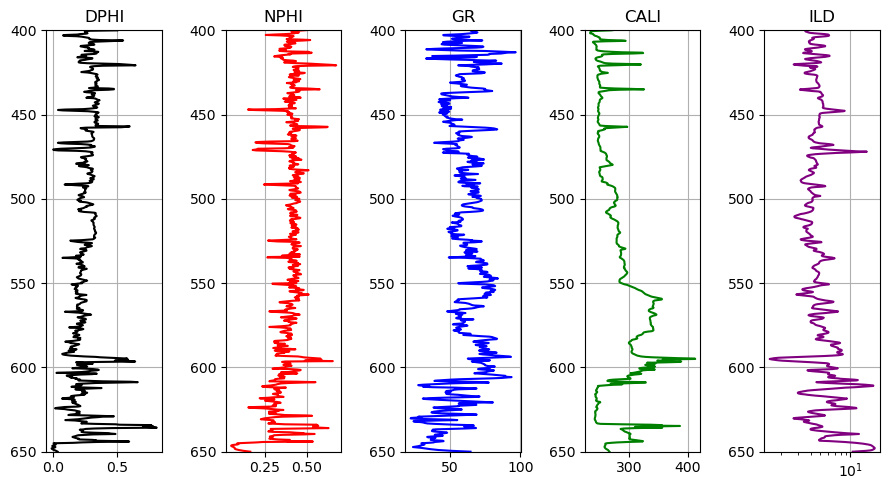

In [14]:
#well log data visualization
logs=['DPHI',"NPHI","GR","CALI",'ILD']
color=["black",'red','blue','green','purple']

plt.figure(figsize=(9,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  if logs[i]=="ILD":
    plt.semilogx(well[logs[i]],well['DEPT'],color=color[i])  #semi log for resistivity
  else:
    plt.plot(well[logs[i]],well['DEPT'],color=color[i])    #normal plot

  plt.title(logs[i])
  plt.ylim(650,400)
  plt.grid()

plt.tight_layout()
plt.show()